# Bank Marketing Campaign Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bank-full.csv', sep=';')
pd.set_option('display.max_columns', None)
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

>**No column with null values**

In [4]:
dataset.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


>The **Range** of the various variables can be seen above

# Exploratory Data Analysis and Data Preprocessing

### Count plot and Histogram for Data Visualisation


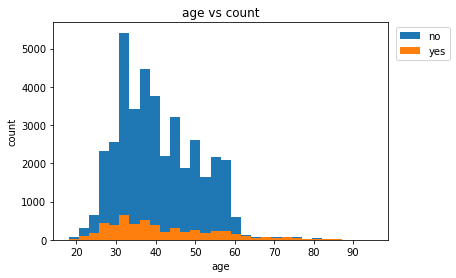

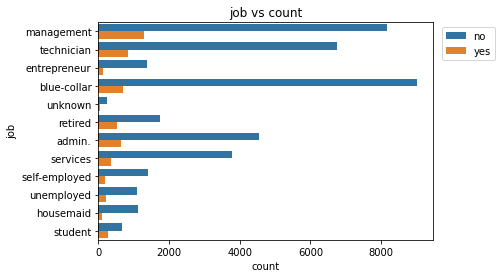

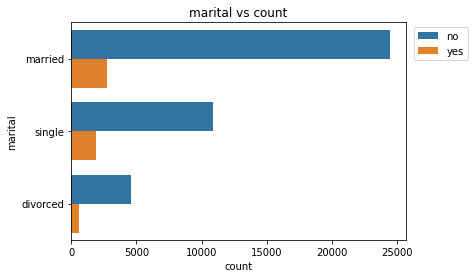

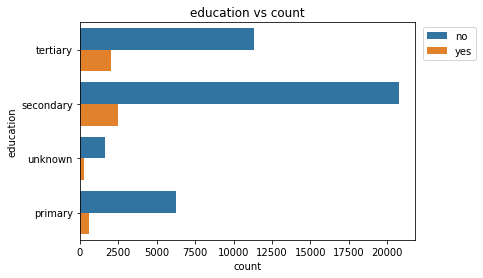

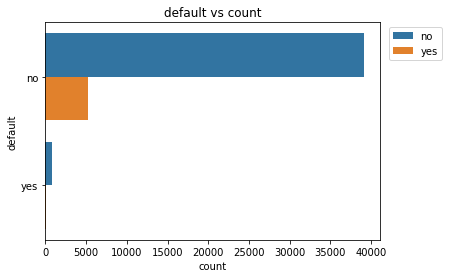

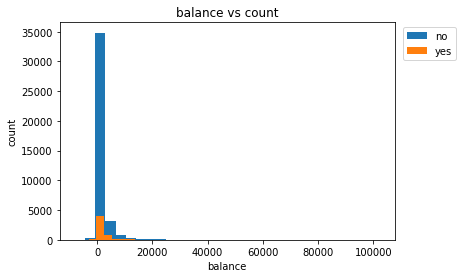

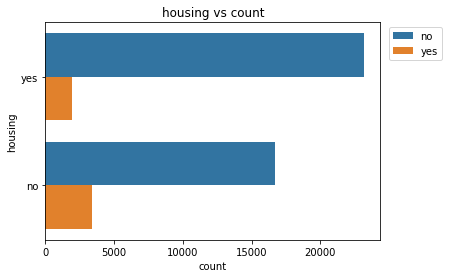

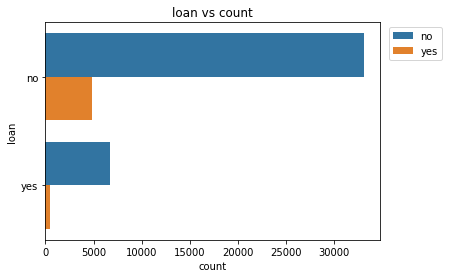

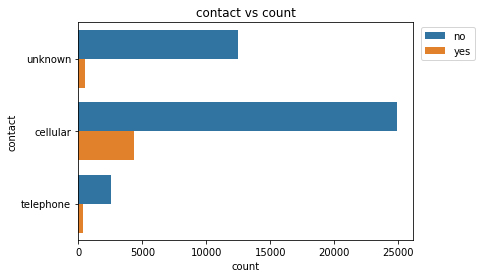

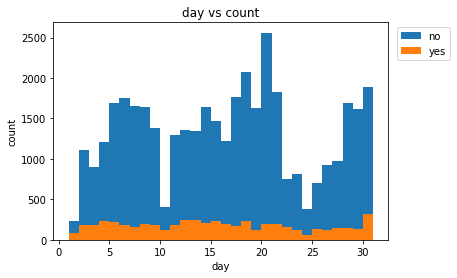

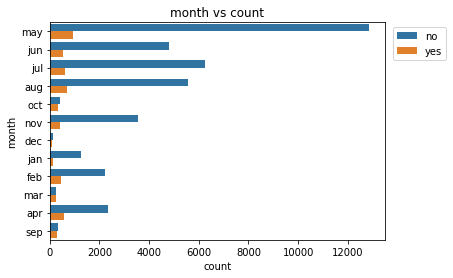

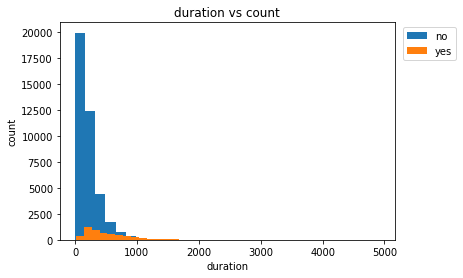

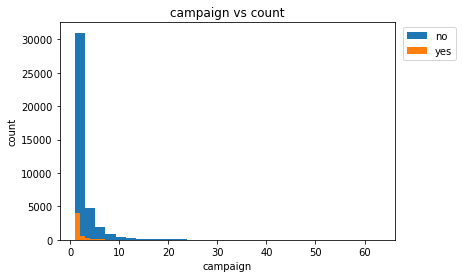

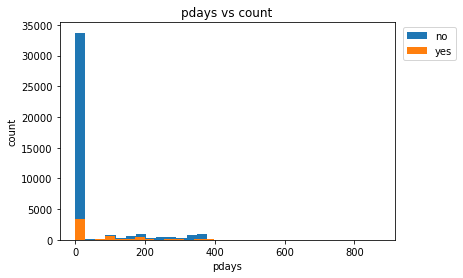

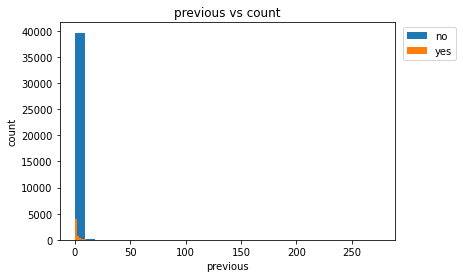

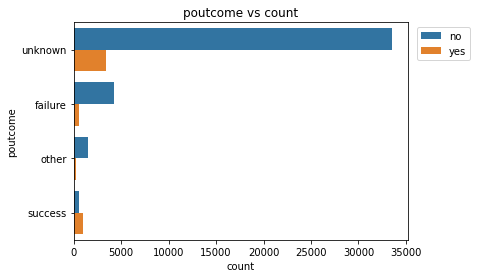

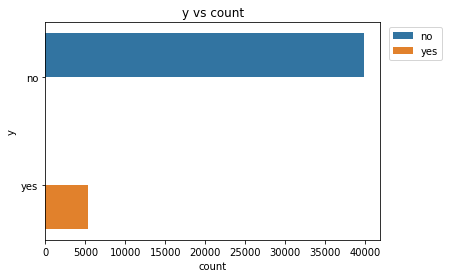

In [5]:
for heading in dataset.columns:
    if dataset[heading].dtypes == np.object:
        sns.countplot(y=dataset[heading], data=dataset, hue=dataset['y'])         #univariate analysis
        plt.legend(loc="upper left", bbox_to_anchor=(1.01,1))
        plt.title(heading + ' vs count')
        plt.show()
    else:
        plt.hist(dataset[dataset['y'] == 'no'][heading], bins=30, label='no')
        plt.hist(dataset[dataset['y'] == 'yes'][heading], bins=30, label='yes')
        plt.legend(loc="upper left", bbox_to_anchor=(1.01,1))
        plt.title(heading + ' vs count')
        plt.ylabel('count')
        plt.xlabel(heading)
        plt.show()
    print("\n")

>**Count plot and Histogram inferences :**
><ul>
    <li>Target variable (y) is highly imbalanced</li>
    <li>A lot of unknown values</li>
    <li>Majority of people who subscribed to the term deposit are 25-45 years old</li>
    <li>Majority of people who subscribed to the term deposit are married</li>
    <li>Majority of people who subscribed to the term deposit do not have credit in default</li>
    <li>Majority of people who subscribed to the term deposit have very low yearly average balance</li>
    <li>Majority of people who subscribed to the term deposit do not have a house loan or a personal loan</li>
    <li>Majority of people who subscribed to the term deposit in May</li>
    <li>The duration is not known before a call is performed and after the end of the call y is obviously known.</li>
</ul>

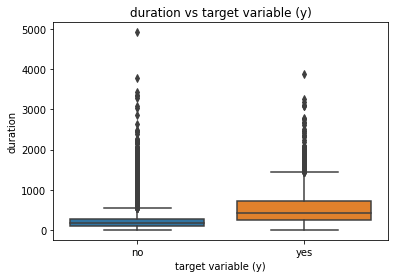

In [6]:
sns.boxplot(y=dataset['duration'], x=dataset['y'])
plt.title('duration vs target variable (y)')
plt.xlabel('target variable (y)')
plt.show()

In [7]:
dataset.drop('duration', inplace=True, axis=1)
print(dataset.shape)

(45211, 16)


**Task : Handle missing data before continuing with EDA**

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


### Frequency Encoding

In [9]:
def filter(temp, x):
    if(x != 'unknown'):
        return temp[x]                                                            #Known values encoded w.r.t. frequency
    else:
        return -1                                                                 #Unknown values encoded as -1

for col in dataset.columns:
    if dataset[col].dtype == np.object:
        temp = (dataset.groupby(col).size())/ len(dataset)
        temp = dict(temp)
        temp = {k: v for k, v in sorted(temp.items(), key=lambda item: item[1])}  #sorting dictionary keys with help of frequency values
        j=0
        for item in temp.keys():
            if item != 'unknown':
                temp[item] = j
                j = j+1
        dataset[col] = dataset[col].apply(lambda x : filter(temp, x))
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,9,2,1,1,2143,1,1,-1,5,11,1,-1,0,-1,1
1,44,8,1,2,1,29,1,1,-1,5,11,1,-1,0,-1,1
2,33,3,2,2,1,2,1,0,-1,5,11,1,-1,0,-1,1
3,47,10,2,-1,1,1506,1,1,-1,5,11,1,-1,0,-1,1
4,33,-1,1,-1,1,1,0,1,-1,5,11,1,-1,0,-1,1


> **Frequency encoding will preserve the information about the values of distributions.**

In [10]:
print('Null Values :\n')                                                          #all null values in our dataset
for col in dataset.columns:
    temp = dataset[dataset[col] == -1]
    if not temp.empty:
        print(str(temp[col].value_counts()))
        print('\n')

Null Values :

-1    288
Name: job, dtype: int64


-1    1857
Name: education, dtype: int64


-1    50
Name: balance, dtype: int64


-1    13020
Name: contact, dtype: int64


-1    36954
Name: pdays, dtype: int64


-1    36959
Name: poutcome, dtype: int64




## Decision Tree Classifier to handle missing data

In [0]:
from sklearn.tree import DecisionTreeClassifier

for col in dataset.columns:
    test = dataset[dataset[col] == -1]
    train = dataset[dataset[col] != -1]
    if not test.empty:
        classifier = DecisionTreeClassifier()
        classifier.fit(train.drop(col, axis=1), train[col])
        test.loc[:, col] = classifier.predict(test.drop(col, axis=1))             #predict values for null data with trained classifier
        train = train.append(test)
        dataset = train.copy()

In [12]:
print('Null Values :\n')
for col in dataset.columns:
    temp = dataset[dataset[col] == -1]
    if not temp.empty:
        print(str(temp[col].value_counts()))
        print('\n')

Null Values :



> Handled the Null Values

## Pre-process Outliers

**IQR**<br>
The interquartile range (IQR) is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles<br>IQR = Q3 − Q1.

### Boxplots for Data Visualisation

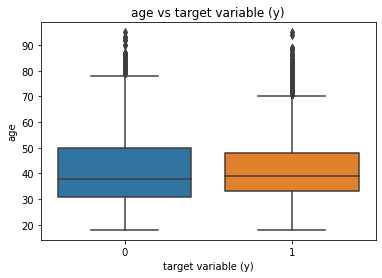

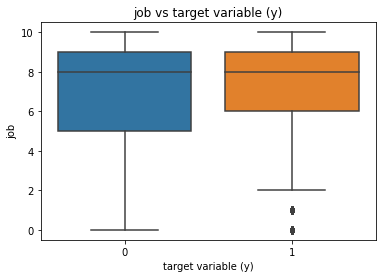

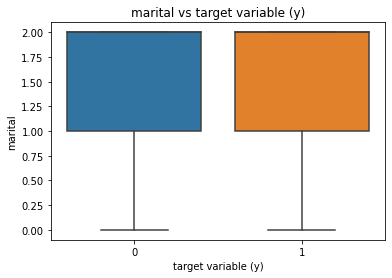

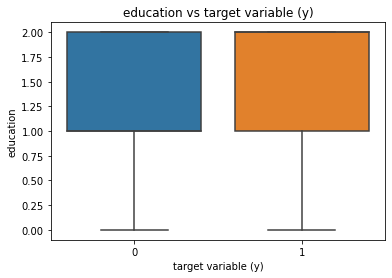

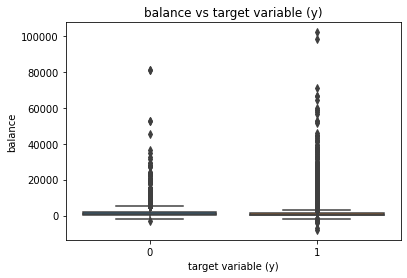

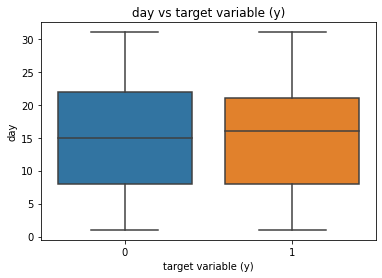

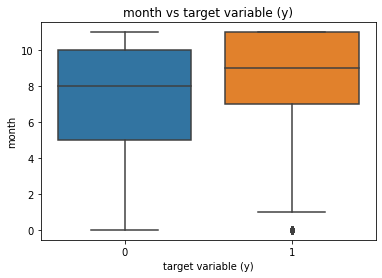

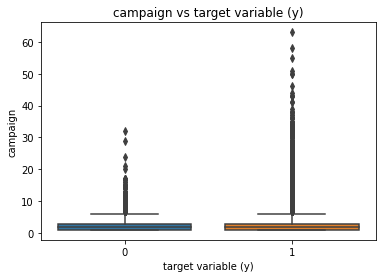

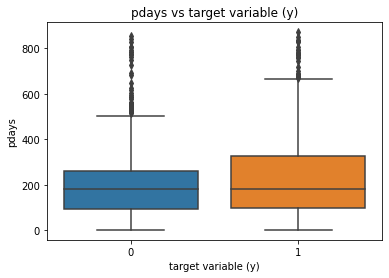

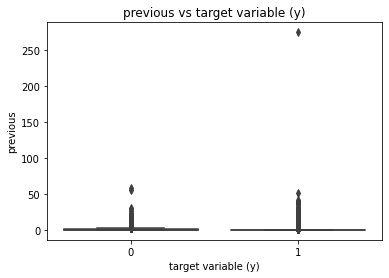

In [13]:
columns = ['age', 'job', 'marital', 'education', 'balance', 'day', 'month', 'campaign', 'pdays', 'previous']
for col in columns:
    if col != 'y':
        sns.boxplot(y=dataset[col], x=dataset['y'])                               #bivariate analysis
        plt.title(col +' vs target variable (y)')
        plt.xlabel('target variable (y)')
        plt.show()

In [14]:
columns = ['age', 'job', 'marital', 'education', 'balance', 'day', 'month', 'campaign', 'pdays', 'previous']
print('IQR:\n')
for col in columns:
    iqr = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
    print(col +' : ' + str(iqr))

IQR:

age : 15.0
job : 3.0
marital : 1.0
education : 1.0
balance : 1357.0
day : 13.0
month : 4.0
campaign : 2.0
pdays : 215.0
previous : 0.0


> **Analysis :**<br>
><ul>
    <li>age, job, month and previous are not real outliers as they do not have highly ambiguous values</li>
    <li>balance, campaign, pdays have outliers</li>
 </ul>

In [0]:
codeList = ['balance', 'campaign', 'pdays']
for item in codeList:
    Q1 = dataset[item].quantile(0.25)
    Q3 = dataset[item].quantile(0.75)
    IQR = Q3 - Q1
    top = Q3 + (1.5 * IQR)
    bottom = Q1 - (1.5 * IQR)
    dataset.loc[dataset[item] > top, item] = top                                  #top coding to remove outliers
    dataset.loc[dataset[item] < bottom, item] = bottom                            #bottom coding to remove outliers  

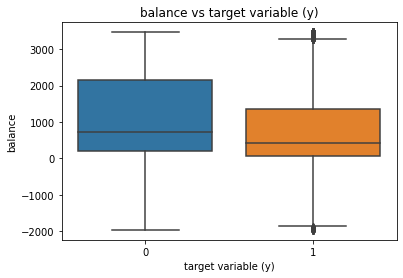

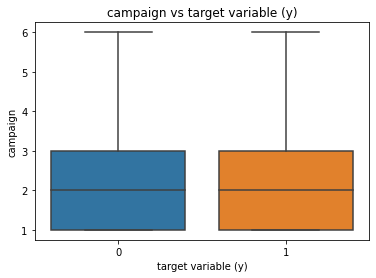

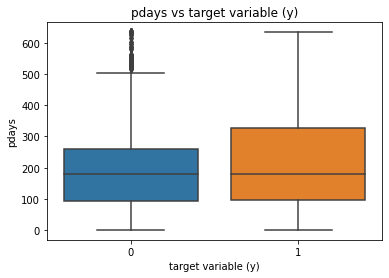

In [16]:
columns = ['balance', 'campaign', 'pdays']
for col in columns:
    sns.boxplot(y=dataset[col], x=dataset['y'])                                   #bivariate analysis
    plt.title(col +' vs target variable (y)')
    plt.xlabel('target variable (y)')
    plt.show()

> outliers have been handled

## Heatmap for Data Visualisation

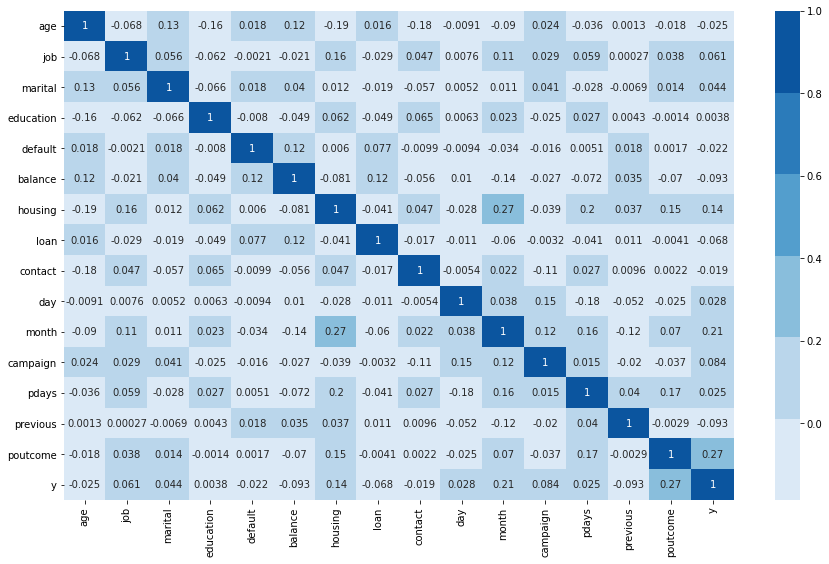

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(15,9))
sns.heatmap(dataset.corr(), annot=True, cmap=sns.color_palette("Blues"), ax=ax)   #bivariate Analysis
plt.show()

>**Analysis :**<br>
><ul>
    <li>age has a negative correlation with housing, contact and education</li>
    <li>housing has a correlation with job, month and pdays</li>
    <li>month has a high correlation with pdays</li>
    <li>pdays has a correlation with poutcome</li>
    <li>y has a high correlation with poutcome and month</li>
  </ul>

In [0]:
labels = dataset.iloc[:, :-1].columns.to_list()
X = dataset.iloc[:,:-1].values                                                    #Seperating independent variables and target variable
y = dataset.iloc[:,-1].values

# Feature Selection using Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [22]:
select = SelectFromModel(classifier, threshold=0.05)
select.fit(X_train, y_train)                                                      # select features that have an importance of more than 0.05

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
 

In [23]:
print('Selected features are :')
for feature_list_index in select.get_support(indices=True):                       #printing selected features
    print(labels[feature_list_index])

Selected features are :
age
job
balance
day
month
pdays
previous
poutcome


In [0]:
X_new_train = select.transform(X_train)
X_new_test = select.transform(X_test)

In [25]:
classifier_new = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
classifier_new.fit(X_new_train, y_train)                                          #train classifier on new data (with selected features)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)                                                    #accuracy score on original data

0.918279332080062

In [27]:
y_new_pred = classifier_new.predict(X_new_test)
accuracy_score(y_test, y_new_pred)                                                #accuracy score on new data

0.9204909875041468

> **Obtained a better score after feature selection**

# Dimensionality reduction using PCA

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()                                                         #Scaling data for more accuracy
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(.95)                                                                    #min components such that variance = 95%

In [31]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

## Feature Selection vs Dimentionality reduction

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
classifier = LogisticRegression(solver = 'lbfgs')

In [34]:
classifier.fit(X_new_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_new_pred = classifier.predict(X_new_test)
print('accuracy score : ' + str(accuracy_score(y_test, y_new_pred)))              #accuracy score on feature selection

accuracy score : 0.8919606325334513


In [36]:
classifier.fit(X_pca_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pca_pred = classifier.predict(X_pca_test)
print('accuracy score : ' + str(accuracy_score(y_test, y_pca_pred)))              #accuracy score on dimentionality reduction

accuracy score : 0.8917394669910428


In [38]:
print('Feature Selection model : ' + str(X_new_train.ndim))                       #no. of dimensions in each case
print('Dimensionality Reduction model : ' +  str(X_pca_train.ndim))

Feature Selection model : 2
Dimensionality Reduction model : 2


In [39]:
print('mean cross validation error in Feature Selection model : ' + str(np.mean(cross_val_score(classifier, X_new_train, y_train, cv=10))))
print('mean cross validation error in Dimensionality Reduction model : ' + str(np.mean(cross_val_score(classifier, X_pca_train, y_train, cv=10))))

mean cross validation error in Feature Selection model : 0.8867783356495018
mean cross validation error in Dimensionality Reduction model : 0.8879673114422797


>**Data with Feature Selection would be chosen :**<br>
><ul>
  <li>Both have similar accuracy score</li>
  <li>Both have similar cross validation error</li>
  <li>They have same number of dimensions</li>
  <li>Feature selection nearly halves the number of independent variable required</li>
</ul>



# Model Training and Evaluation

## Logistic Regression

### Hyperparameter tuning

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score

In [41]:
parameters = {'C' : [0.001, 0.01, 0.1, 1, 10]}                                    #finding the correct 'C' value for our model
classifier = LogisticRegression(class_weight='balanced')
classifier_ = GridSearchCV(classifier, parameters, cv=5)
classifier_.fit(X_new_train, y_train)
print('Best parameters : ' + str(classifier_.best_params_))
print('Best score : ' + str(classifier_.best_score_))

Best parameters : {'C': 0.001}
Best score : 0.7462121987889117


In [42]:
classifier = LogisticRegression(C=0.001, class_weight='balanced')
classifier.fit(X_new_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred = classifier.predict(X_new_test)                                           #Evaluating the model
confusion_lr = confusion_matrix(y_test, y_pred)
accuracy_lr = accuracy_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
print('confusion matrix :\n', confusion_lr)
print('accuracy score : ' + str(accuracy_lr))
print('F1 score : ' + str(f1_lr))

confusion matrix :
 [[ 685  349]
 [1898 6111]]
accuracy score : 0.7515205131040584
F1 score : 0.8447024673439767


## Random Forest Classifier

### Hyperparameter tuning

In [44]:
parameters = { 'max_depth': [5, 10, 15, 25],                                      #finding correct 'max_depth' and 'n_estimators' for our model
               'n_estimators': [75, 100, 200, 250]}
classifier = RandomForestClassifier()
classifier_ = GridSearchCV(classifier, parameters, cv=5, n_jobs=-1)
classifier_.fit(X_new_train, y_train)
print('Best parameters : ' + str(classifier_.best_params_))
print('Best score : ' + str(classifier_.best_score_))

Best parameters : {'max_depth': 25, 'n_estimators': 100}
Best score : 0.9138188748073954


In [45]:
classifier = RandomForestClassifier(max_depth=25, n_estimators=100, n_jobs=-1)
classifier.fit(X_new_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [46]:
y_pred = classifier.predict(X_new_test)                                           #Evaluating the model
confusion_rf = confusion_matrix(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
print('confusion matrix :\n', confusion_rf)
print('accuracy score : ' + str(accuracy_rf))
print('F1 score : ' + str(f1_rf))

confusion matrix :
 [[ 464  570]
 [ 153 7856]]
accuracy score : 0.9200486564193299
F1 score : 0.9560085184058411


## SVM

In [0]:
from sklearn.svm import SVC
scaler = StandardScaler()                                                         #Scaling our data to train on SVM model
X_new_train = scaler.fit_transform(X_new_train)
X_new_test = scaler.transform(X_new_test)

### Hyperparameter tuning

In [48]:
parameters = {'C' : [0.001, 0.01, 0.1, 1],                                        #finding correct 'C' and 'gamma' for our model
              'gamma' : [0.001, 0.01, 0.1, 1]}
classifier = SVC()
classifier_ = GridSearchCV(classifier, parameters, cv=5, n_jobs=-1, verbose=1)
classifier_.fit(X_new_train, y_train)
print('Best parameters : ' + str(classifier_.best_params_))
print('Best score : ' + str(classifier_.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 19.5min finished


Best parameters : {'C': 1, 'gamma': 1}
Best score : 0.9014874916103699


In [49]:
classifier = SVC(C=1 , gamma=1, verbose=1)
classifier.fit(X_new_train, y_train)

[LibSVM]

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001, verbose=1)

In [50]:
y_pred = classifier.predict(X_new_test)                                           #Evaluating the model
confusion_svm = confusion_matrix(y_test, y_pred)
accuracy_svm = accuracy_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
print('confusion matrix :\n', confusion_svm)
print('accuracy score : ' + str(accuracy_svm))
print('F1 score : ' + str(f1_svm))

confusion matrix :
 [[ 297  737]
 [ 109 7900]]
accuracy score : 0.9064469755612076
F1 score : 0.9491769794545236


## Summary

In [51]:
models = [['Logistic Regression', accuracy_lr, f1_lr],
          ['Random Forest', accuracy_rf, f1_rf],
          ['SVM', accuracy_svm, f1_svm]]
df = pd.DataFrame(models, columns=['Model', 'Accuracy Score', 'F1 Score'])
df

,Model,Accuracy Score,F1 Score
0,Logistic Regression,0.751521,0.844702
1,Random Forest,0.920049,0.956009
2,SVM,0.906447,0.949177


> **Random Forest** is the best model.<br>

